# <font color = 'orange'> Results </font>

## <font color = 'orange'> Libraries </font>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, special
import powerlaw

## <font color = 'orange'> Random graph </font>

In [2]:
random_graph = nx.read_gpickle('graphs/random_graph.gpickle')
n = 2000
p = 0.4

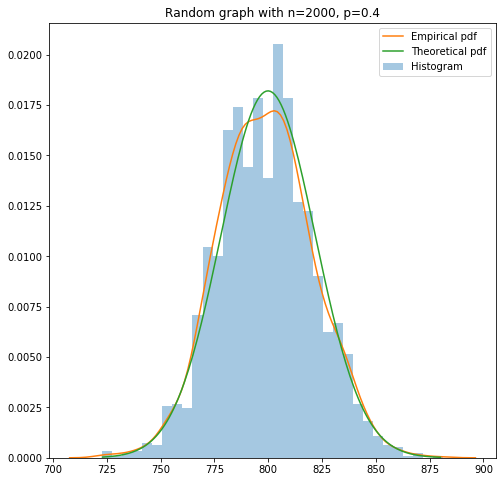

In [3]:
plt.figure(figsize = (8,8))
degrees = [degree for node, degree in random_graph.degree]
sns.distplot(degrees, norm_hist=True, kde=False, label='Histogram')
sns.distplot(degrees, hist=False, label='Empirical pdf')
x = np.arange(min(degrees), max(degrees))
sns.lineplot(x, stats.binom.pmf(x, n, p), label='Theoretical pdf')
plt.title('Random graph with n={}, p={}'.format(n, p))
plt.savefig('results/random_graph.png')

**Degree distribution follows binomial distribution with parameters n and p.**

In [4]:
p_hat = random_graph.number_of_edges()*2/(n*(n-1))
print('Estimated p = {}'.format(round(p_hat, 5)))
print('True p = {}'.format(p))

Estimated p = 0.39964
True p = 0.4


## <font color = 'orange'> Watts-Strogatz graph </font>

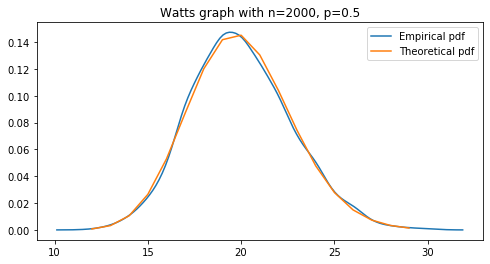

In [5]:
watts_graph = nx.read_gpickle('graphs/watts_graph.gpickle')
N = 2000
K = 20
p = 0.5
plt.figure(figsize=(8,4))
degrees = [degree for node, degree in watts_graph.degree]
sns.distplot(degrees, hist=False, label='Empirical pdf')
ks = np.arange(min(degrees), max(degrees))
p_k = [None]*len(ks)
for k in ks:
    f = min(k-K//2, K//2)
    ns = np.arange(0, f+1, 1, dtype=int)
    A = [None]*len(ns)
    for n in ns:
        c = special.binom(K//2, n)
        A[n] = c*(1-p)**n*p**(K//2-n)*(p*K//2)**(k-n-K//2)/(np.math.factorial(k-n-K//2))*np.exp(-p*K//2)
    p_k[k-ks[0]] = sum(A)
sns.lineplot(ks, p_k, label='Theoretical pdf')
plt.title('Watts graph with n={}, p={}'.format(N, p))
plt.savefig('results/watts_graph.png')

**Degree distribution follows distribution from lecture.**

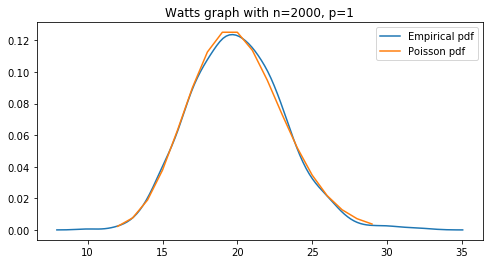

In [6]:
watts_graph_poisson = nx.read_gpickle('graphs/watts_graph_poisson.gpickle')
N = 2000
K = 20
p = 1
plt.figure(figsize=(8,4))
degrees = [degree for node, degree in watts_graph_poisson.degree]
sns.distplot(degrees, hist=False, label='Empirical pdf')
sns.lineplot(ks, stats.poisson.pmf(ks-n, K//2), label='Poisson pdf')
plt.title('Watts graph with n={}, p={}'.format(N, p))
plt.savefig('results/watts_graph_poisson.png')

**Degree distribution follows Poisson distribution.**

## <font color = 'orange'> Barabasi-Albert graph </font>

In [7]:
barabasi_graph = nx.read_gpickle('graphs/barabasi_graph.gpickle')
n = 2000
m = 3

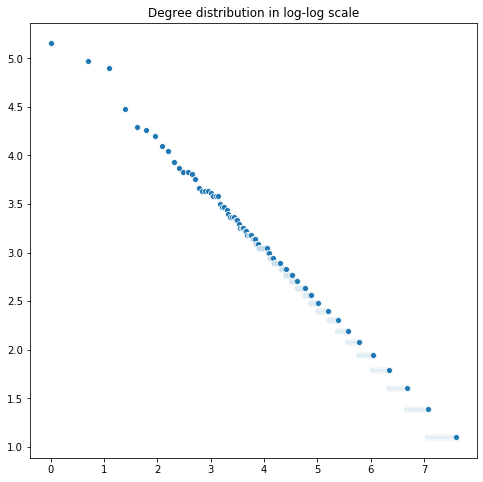

In [8]:
plt.figure(figsize=(8,8))
degrees = [degree for node, degree in barabasi_graph.degree]
x = np.arange(1, 1 + len(degrees))
sns.scatterplot(np.log(x), sorted(np.log(degrees), reverse=True))
plt.title('Degree distribution in log-log scale')
plt.show()

**Degree distribution in loglog scale is close to straight line, then we can assumne it was implemented correctly.**

In [9]:
results = powerlaw.Fit(degrees)

Calculating best minimal value for power law fit
C:\Users\Jarek\Anaconda3\envs\diffusion\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [10]:
print('Alpha calculated by powerlaw: {}'.format(round(results.alpha, 4)))

Alpha calculated by powerlaw: 2.9895


As we see, calculated alpha is very close to 3, so we can assume the implementation is correct.
\begin{equation}
\huge
p_k\sim k^{-\alpha}
\end{equation}

## <font color = 'orange'> Summary - Exercise 1 </font>

1) Examples of graphs with N=20 are stored in *results* directory.

2) Graphs with N=2000 were generated, saved to files in *graphs* directory. 

3) Graphs properties were saved in *properties.csv* file in *results* directory.

4) Nodes degree distributions were plotted in this file and saved in *results* directory.